In [1]:
#Imported required libraries 

import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import f1_score
import keras
import tensorflow
from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam, RMSprop

Using TensorFlow backend.


## TRAINING THE MODEL

### Data Preprocessing 

In [2]:
path = "D:\Other\Internship Studio\Project\\"

In [3]:
data = pd.read_csv(path + "train.csv")

In [4]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [5]:
#View the shape of the csv file
data.shape

(14999, 9)

In [6]:
#Convert the data in the category column to numerical form by mapping each unique letter to a number

category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
data["category"] = data["category"].map(category)

In [7]:
data.category

0        6
1        4
2        3
3        8
4        4
        ..
14994    1
14995    4
14996    2
14997    7
14998    4
Name: category, Length: 14999, dtype: int64

In [8]:
#Removing non-numerical entries from 4 columns 

data = data[data.views!='F']
data = data[data.likes!='F']
data = data[data.dislikes!='F']
data = data[data.comment!='F']

In [9]:
#Converting the cells from str to numerical values

data["views"] = pd.to_numeric(data["views"])
data["likes"] = pd.to_numeric(data["likes"])
data["dislikes"] = pd.to_numeric(data["dislikes"])
data["comment"] = pd.to_numeric(data["comment"])
data["adview"] = pd.to_numeric(data["adview"])

In [10]:
data.shape

(14637, 9)

In [11]:
#Transform the values of 3 columns from str to numerical, where LabelEncoder assigns it a numerical value

data['duration'] = LabelEncoder().fit_transform(data['duration'])
data['vidid'] = LabelEncoder().fit_transform(data['vidid'])
data['published'] = LabelEncoder().fit_transform(data['published'])

In [12]:
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [13]:
import datetime
import time

In [14]:
#Write a function to convert the values of duration to the number of seconds 

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H', 'M', 'S']
    for i in y:
        if i not in P:
            mm += i
        else:
            if (i=='H'):
                h = mm
                mm = ''
            elif (i=='M'):
                m = mm
                mm = ''
            else: 
                s = mm
                mm = ''
    if (h==''):
        h = '00'
    if (m==''):
        m = '00'
    if (s==''):
        s = '00'
    bp = h + ':' + m + ':' + s
    return bp

train = pd.read_csv("train.csv")
mp = pd.read_csv(path + "train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s) 

In [15]:
time1 = time.apply(func_sec)

In [16]:
#Duration now contains numerical values in terms of number of seconds

data['duration'] = time1
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


In [17]:
data.describe()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
count,14637.00000,1.463700e+04,1.463700e+04,14637.000000,14637.000000,14637.000000,14637.000000,14637.000000,14637.000000
mean,7318.00000,2.066030e+03,7.112280e+05,2785.841293,254.429391,409.135547,1547.372754,1040.179067,4.607228
std,4225.48228,5.282706e+04,2.731475e+06,8938.490736,1029.774864,1511.176934,582.911556,2316.818747,1.576312
min,0.00000,1.000000e+00,4.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3659.00000,1.000000e+00,3.151700e+04,88.000000,7.000000,7.000000,1135.000000,187.000000,4.000000
50%,7318.00000,2.000000e+00,1.586680e+05,450.000000,38.000000,46.000000,1700.000000,325.000000,4.000000
75%,10977.00000,6.000000e+00,5.836130e+05,1863.000000,167.000000,224.000000,2064.000000,723.000000,6.000000
max,14636.00000,5.429665e+06,1.380479e+08,283824.000000,49449.000000,75045.000000,2383.000000,42317.000000,8.000000


### Data Visualisation 

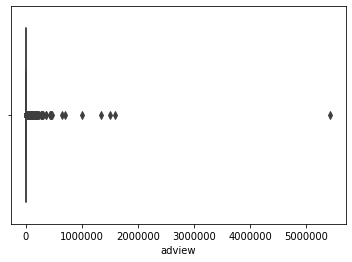

In [18]:
ax2 = sns.boxplot(x=data["adview"])

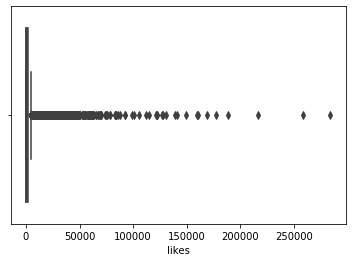

In [19]:
ax3 = sns.boxplot(x=data["likes"])

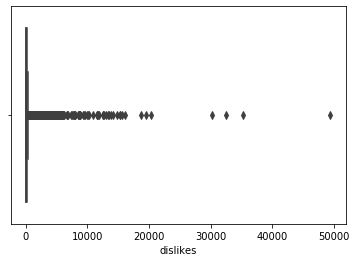

In [20]:
ax4 = sns.boxplot(x=data["dislikes"])

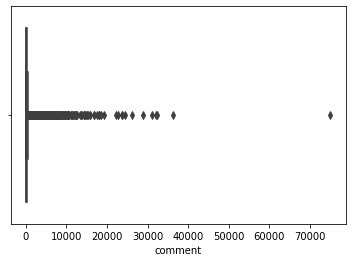

In [21]:
ax5 = sns.boxplot(x=data["comment"])

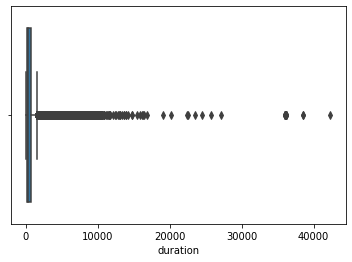

In [22]:
ax6 = sns.boxplot(x=data["duration"])

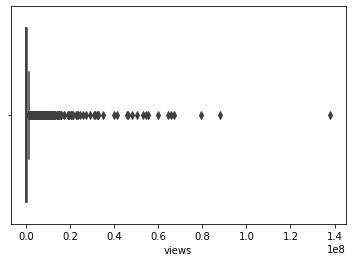

In [23]:
ax7 = sns.boxplot(x=data["views"])

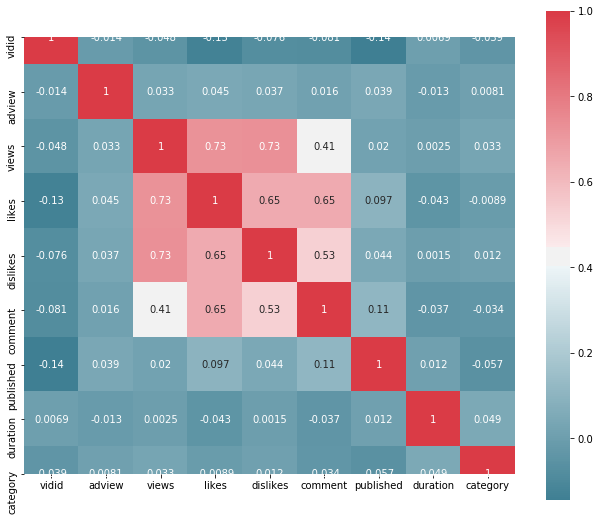

In [24]:
#Create heatmap to check correlation between attributes

f, ax = plt.subplots(figsize=(11,9))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10,as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

### Removing Outliers

In [25]:
data2 = data

In [26]:
#Finding the Inter Quartile Range

q1 = data2.quantile(0.25)
q3 = data2.quantile(0.75)

IQR = q3-q1

print(IQR)

vidid          7318.0
adview            5.0
views        552096.0
likes          1775.0
dislikes        160.0
comment         217.0
published       929.0
duration        536.0
category          2.0
dtype: float64


In [27]:
#Sum of outliers for each attribute

print(((data2 < (q1 - 1.5 * IQR)) | (data2 > (q3 + 1.5 * IQR))).sum())

vidid           0
adview       2268
views        1641
likes        2021
dislikes     1927
comment      2151
published       0
duration     2049
category        0
dtype: int64


In [28]:
#Removing outliers from every attribute

x1 = data2[~((data2 < (q1 - 1.5 * IQR)) |(data2 > (q3 + 1.5 * IQR))).any(axis=1)]
x1.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4
5,517,4,78,0,0,0,2040,15,4


In [29]:
x1.describe()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
count,8167.000000,8167.000000,8.167000e+03,8167.000000,8167.000000,8167.000000,8167.000000,8167.000000,8167.000000
mean,7672.227011,2.412391,1.797943e+05,547.413004,43.641484,64.105057,1464.205583,380.849639,4.594221
std,4236.094478,2.442858,2.509860e+05,779.234322,65.543662,100.611936,606.360018,322.199011,1.585402
min,0.000000,1.000000,4.900000e+01,0.000000,0.000000,0.000000,1.000000,5.000000,1.000000
25%,4173.000000,1.000000,1.637400e+04,50.000000,4.000000,4.000000,1032.000000,152.000000,4.000000
50%,7694.000000,1.000000,7.355100e+04,224.000000,16.000000,21.000000,1565.000000,273.000000,4.000000
75%,11423.000000,3.000000,2.310915e+05,712.000000,54.000000,77.000000,2034.000000,537.000000,6.000000
max,14633.000000,13.000000,1.407558e+06,4524.000000,406.000000,549.000000,2383.000000,1527.000000,8.000000


In [30]:
x2 = x1

### Split and Normalize Data

In [31]:
#Create target and feature columns

Y_train = pd.DataFrame(data = x2.iloc[:, 1].values, columns = ['target'])
Y_train

,target
0,2
1,1
2,6
3,1
4,4
...,...
8162,11
8163,2
8164,4
8165,1


In [32]:
x2=x2.drop(["adview"],axis=1)
x2=x2.drop(["vidid"],axis=1)
x2.head()

,views,likes,dislikes,comment,published,duration,category
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4
5,78,0,0,0,2040,15,4


In [33]:
#Split data into 80/20 train test split

X_train, X_test, y_train, y_test = train_test_split(x2, Y_train, test_size=0.2, random_state=42)
X_train.shape

(6533, 7)

In [34]:
#Standardize the features

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.2640957570654967

In [35]:
#Write a function to calculate the errors for each model 

def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))  

In [36]:
#Linear Regression model 

from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 1.633034291115642
Mean Squared Error: 5.569326382799355
Root Mean Squared Error: 2.3599420295421147


In [37]:
#Support Vector model

from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)


E:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Mean Absolute Error: 1.3573231604365628
Mean Squared Error: 6.609335324870026
Root Mean Squared Error: 2.570862758855483


In [38]:
#Decision Tree model

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 1.9914320685434517
Mean Squared Error: 10.69767441860465
Root Mean Squared Error: 3.270729951953333


In [39]:
#Random forest model

from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators = 200, max_depth = 25, min_samples_split=15, min_samples_leaf=2)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Mean Absolute Error: 1.5528154418584095
Mean Squared Error: 5.133077484429086
Root Mean Squared Error: 2.2656296000072667


In [40]:
#Create an artificial neural network 

ann = tensorflow.keras.models.Sequential([Dense(6, activation="relu", input_shape=X_train.shape[1:]), Dense(6,activation="relu"), Dense(1)])
loss = tensorflow.keras.losses.MeanSquaredError()
ann.compile(optimizer="Adam",loss='mse',metrics=['mse'])

In [41]:
history=ann.fit(X_train,y_train,epochs=100)

Epoch 1/100
205/205 [==============================] - 0s 861us/step - loss: 7.6438 - mse: 7.6438
Epoch 2/100
205/205 [==============================] - ETA: 0s - loss: 6.3570 - mse: 6.357 - 0s 739us/step - loss: 6.2922 - mse: 6.2922
Epoch 3/100
205/205 [==============================] - 0s 851us/step - loss: 6.1649 - mse: 6.1649
Epoch 4/100
205/205 [==============================] - 0s 1ms/step - loss: 6.0568 - mse: 6.0568
Epoch 5/100
205/205 [==============================] - 0s 827us/step - loss: 5.9678 - mse: 5.9678
Epoch 6/100
205/205 [==============================] - 0s 842us/step - loss: 5.9012 - mse: 5.9012
Epoch 7/100
205/205 [==============================] - 0s 686us/step - loss: 5.8522 - mse: 5.8522
Epoch 8/100
205/205 [==============================] - 0s 691us/step - loss: 5.8173 - mse: 5.8173
Epoch 9/100
205/205 [==============================] - 0s 895us/step - loss: 5.7888 - mse: 5.7888
Epoch 10/100
205/205 [==============================] - 0s 1ms/step - loss: 5.7720

205/205 [==============================] - 0s 720us/step - loss: 5.4302 - mse: 5.4302
Epoch 84/100
205/205 [==============================] - 0s 798us/step - loss: 5.4261 - mse: 5.4261
Epoch 85/100
205/205 [==============================] - 0s 895us/step - loss: 5.4226 - mse: 5.4226
Epoch 86/100
205/205 [==============================] - 0s 735us/step - loss: 5.4238 - mse: 5.4238
Epoch 87/100
205/205 [==============================] - 0s 730us/step - loss: 5.4261 - mse: 5.4261
Epoch 88/100
205/205 [==============================] - 0s 691us/step - loss: 5.4134 - mse: 5.4134
Epoch 89/100
205/205 [==============================] - 0s 793us/step - loss: 5.4203 - mse: 5.4203
Epoch 90/100
205/205 [==============================] - 0s 939us/step - loss: 5.4123 - mse: 5.4123
Epoch 91/100
205/205 [==============================] - 0s 788us/step - loss: 5.4092 - mse: 5.4092
Epoch 92/100
205/205 [==============================] - 0s 856us/step - loss: 5.4137 - mse: 5.4137
Epoch 93/100
205/205 [=

In [42]:
ann.summary()
print_error(X_test,y_test,ann)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
Mean Absolute Error: 1.5693553360030876
Mean Squared Error: 5.352662748128827
Root Mean Squared Error: 2.3135822328434377


In [43]:
import joblib
joblib.dump(random_forest, "RF_youtubeadview.pkl")

['RF_youtubeadview.pkl']

In [44]:
ann.save("ann_youtubeadview.h5")

## TESTING THE MODEL

### Data Preprocessing 

In [45]:
path2 = "D:\Other\Internship Studio\Project\\"
data_test = pd.read_csv(path + "test.csv")

In [46]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [47]:
data_test.shape

(8764, 8)

In [48]:
#Convert the data in the category column to numerical form by mapping each unique letter to a number

category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
data_test["category"] = data_test["category"].map(category)

data_test.category

0       2
1       6
2       4
3       7
4       2
       ..
8759    3
8760    4
8761    6
8762    4
8763    4
Name: category, Length: 8764, dtype: int64

In [49]:
#Removing non-numerical entries from 4 columns 

data_test = data_test[data_test.views!='F']
data_test = data_test[data_test.likes!='F']
data_test = data_test[data_test.dislikes!='F']
data_test = data_test[data_test.comment!='F']

In [50]:
#Converting the cells from str to numerical values

data_test["views"] = pd.to_numeric(data_test["views"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])
data_test["comment"] = pd.to_numeric(data_test["comment"])

In [51]:
data_test.shape

(8549, 8)

In [52]:
#Transform the values of 3 columns from str to numerical, where LabelEncoder assigns it a numerical value

data_test['duration'] = LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid'] = LabelEncoder().fit_transform(data_test['vidid'])
data_test['published'] = LabelEncoder().fit_transform(data_test['published'])

In [53]:
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,2115,2
1,3444,1040132,8171,340,1047,1825,2055,6
2,1593,28534,31,11,1,1009,1506,4
3,3775,1316715,2284,250,274,116,2265,7
4,7644,1893173,2519,225,116,1892,1625,2


In [54]:
#Write a function to convert the values of duration to the number of seconds 

def checki_test(x_):
    y = x_[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H', 'M', 'S']
    for i in y:
        if i not in P:
            mm += i
        else:
            if (i=='H'):
                h = mm
                mm = ''
            elif (i=='M'):
                m = mm
                mm = ''
            else: 
                s = mm
                mm = ''
    if (h==''):
        h = '00'
    if (m==''):
        m = '00'
    if (s==''):
        s = '00'
    bp = h + ':' + m + ':' + s
    return bp

train = pd.read_csv("train.csv")
mp_test = pd.read_csv(path + "test.csv")["duration"]
time_test = mp_test.apply(checki_test)

def func_sec_test(time_string_):
    h, m, s = time_string_.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s) 

In [55]:
time_test_1 = time_test.apply(func_sec_test)

In [56]:
#Duration now contains numerical values in terms of number of seconds

data_test['duration'] = time_test_1
data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [57]:
data_test.describe()

,vidid,views,likes,dislikes,comment,published,duration,category
count,8549.000000,8.549000e+03,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000,8549.000000
mean,4274.000000,7.586353e+05,2923.643701,262.876126,472.864078,1306.212539,1069.782548,4.611767
std,2468.028059,3.730342e+06,10012.249373,1052.373655,2115.437482,543.152119,2485.572760,1.566363
min,0.000000,2.700000e+01,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,2137.000000,3.138000e+04,87.000000,7.000000,8.000000,891.000000,191.000000,4.000000
50%,4274.000000,1.575880e+05,446.000000,38.000000,47.000000,1435.000000,333.000000,4.000000
75%,6411.000000,5.913440e+05,1900.000000,166.000000,229.000000,1800.000000,702.000000,6.000000
max,8548.000000,2.251478e+08,320072.000000,36023.000000,85250.000000,2105.000000,41326.000000,8.000000


### Data Visualisation

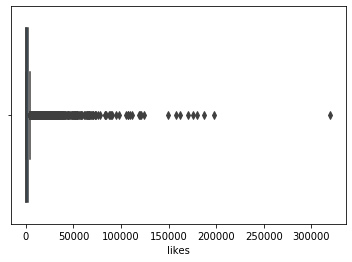

In [58]:
ax_2 = sns.boxplot(x=data_test["likes"])

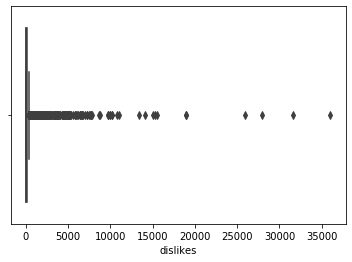

In [59]:
ax_3 = sns.boxplot(x=data_test["dislikes"])

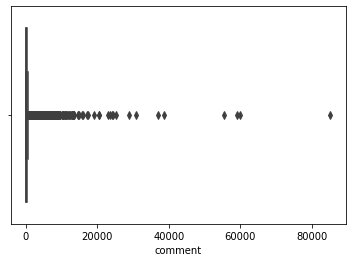

In [60]:
ax_4 = sns.boxplot(x=data_test["comment"])

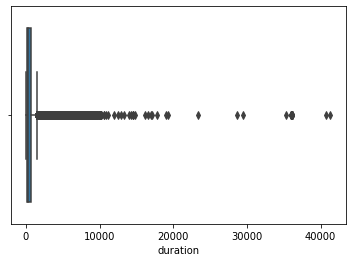

In [61]:
ax_5 = sns.boxplot(x=data_test["duration"])

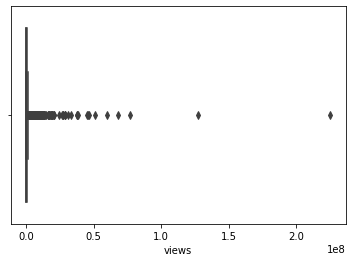

In [62]:
ax_6 = sns.boxplot(x=data_test["views"])

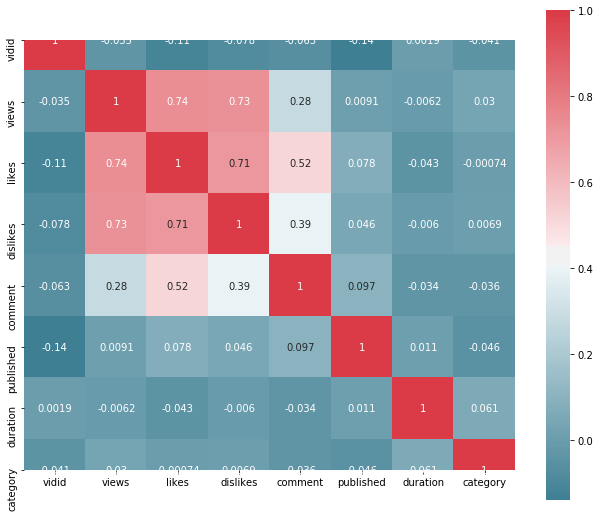

In [63]:
#Create heatmap to check correlation between attributes

f_, ax_ = plt.subplots(figsize=(11,9))
corr_ = data_test.corr()
sns.heatmap(corr_, mask=np.zeros_like(corr_, dtype=np.bool), cmap=sns.diverging_palette(220,10,as_cmap=True), square=True, ax=ax_, annot=True)
plt.show()

### Removing Outliers

In [64]:
#Finding the Inter Quartile Range

q1_ = data_test.quantile(0.25)
q3_ = data_test.quantile(0.75)

IQR_ = q3_-q1_

print(IQR_)

vidid          4274.0
views        559964.0
likes          1813.0
dislikes        159.0
comment         221.0
published       909.0
duration        511.0
category          2.0
dtype: float64


In [65]:
#Sum of outliers for each attribute

print(((data_test < (q1_ - 1.5 * IQR_)) | (data_test > (q3_ + 1.5 * IQR_))).sum())

vidid           0
views         936
likes        1176
dislikes     1133
comment      1283
published       0
duration     1254
category        0
dtype: int64


In [66]:
#Removing outliers from every attribute

x1_ = data_test[~((data_test < (q1_ - 1.5 * IQR_)) |(data_test > (q3_ + 1.5 * IQR_))).any(axis=1)]
x1_.head()

,vidid,views,likes,dislikes,comment,published,duration,category
3,3775,1316715,2284,250,274,116,595,7
6,7531,12921,169,3,73,1060,604,4
7,3112,4502,65,2,8,1840,155,6
8,1835,662956,1841,321,219,955,837,4
12,5107,10954,243,9,3,1793,104,7


In [67]:
x1_.describe()

,vidid,views,likes,dislikes,comment,published,duration,category
count,5553.000000,5.553000e+03,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000,5553.000000
mean,4443.279849,1.848806e+05,555.790023,44.905276,64.909238,1245.644877,362.951378,4.622366
std,2488.989586,2.656912e+05,802.153596,69.664599,100.833531,565.549119,297.080210,1.554318
min,0.000000,2.700000e+01,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000
25%,2285.000000,1.443600e+04,43.000000,3.000000,4.000000,815.000000,153.000000,4.000000
50%,4468.000000,7.175200e+04,210.000000,15.000000,20.000000,1340.000000,273.000000,4.000000
75%,6644.000000,2.318200e+05,719.000000,55.000000,80.000000,1786.000000,501.000000,6.000000
max,8548.000000,1.427767e+06,4554.000000,404.000000,560.000000,2104.000000,1466.000000,8.000000


### Load Model

In [68]:
rf_model = joblib.load("RF_youtubeadview.pkl")
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=15,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [69]:
x1_=x1_.drop(["vidid"],axis=1)

 ###  Normalise Data and Predict Adview Value

In [70]:
scaler = MinMaxScaler()
x_test_ = scaler.fit_transform(x1_)
x_test_

array([[0.92221833, 0.50153711, 0.61881188, ..., 0.05513308, 0.40301576,
        0.85714286],
       [0.00903106, 0.03711023, 0.00742574, ..., 0.50380228, 0.40918437,
        0.42857143],
       [0.00313432, 0.01427317, 0.0049505 , ..., 0.87452471, 0.10143934,
        0.71428571],
       ...,
       [0.07786992, 0.10342556, 0.03465347, ..., 0.10979087, 0.12816998,
        0.28571429],
       [0.50067379, 0.35990338, 0.37376238, ..., 0.82129278, 0.12885538,
        0.42857143],
       [0.00369115, 0.00263505, 0.00247525, ..., 0.9486692 , 0.41603838,
        0.42857143]])

In [71]:
predicted_val = rf_model.predict(x_test_)

In [72]:
predicted_val

array([4.69778268, 1.33861429, 1.98793923, ..., 3.23342702, 2.08019304,
       5.15371741])

In [73]:
predicted_val.shape

(5553,)

### Save Predicted Adviews as csv file

In [74]:
np.savetxt("Predictions.csv", predicted_val, delimiter=",")